# Fuga de Clientes Telecomunicaciones

## 1. Importar Librerías

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Cargar data

In [6]:
df_client = pd.read_csv('./telecom_customer_churn.csv', sep= ';')

## 3. Manipulación de los Datos

In [7]:
df_client.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


***Diccionario de Datos***:
* **Churn**: Si el cliente abandonó o no (Sí o No).<br>
* **CustomerID**: Identificación del cliente.<br>
* **Gender**: Si el cliente es hombre o mujer.<br>
* **SeniorCitizen**: Si el cliente es adulto mayor o no.<br>
* **Partner**: Si el cliente tiene pareja o no (Sí o No).<br>
* **Dependets**: Si el cliente tiene dependientes o no (Sí o No).
* **Tenure**: Número de meses que el cliente ha permanecido en la empresa.<br>
* **PhoneService**: Si el cliente tiene servicio telefónico o no (Sí o No).<br>
* **MultipleLines**: Si el cliente tiene varias líneas o no (Sí o No, Sin servicio telefónico).<br>
* **InternetService**: Proveedor de servicios de Internet del cliente (DSL, Fibra óptica, No).<br>
* **OnlineSecurity**: Si el cliente tiene seguridad en línea o no (Sí o No, Sin servicio de Internet).<br>
* **OnlineBackup**: Si el cliente tiene respaldo en línea o no (Sí o No, Sin servicio de Internet).<br>
* **DeviceProtection**: Si el cliente tiene protección de dispositivo o no (Sí o No, Sin servicio de Internet).<br>
* **TechSupport**: Si el cliente cuenta con soporte técnico o no (Sí o No, Sin servicio de internet).<br>
* **StreamingTV**: Si el cliente tiene transmisión de TV o no (Sí o No, Sin servicio de Internet).<br>
* **StreamingMovies**: Si el cliente tiene películas en streaming o no (Sí o No, Sin servicio de Internet).<br>
* **Contract**: El plazo del contrato del cliente (Mes a mes, Un año, Dos años).<br>
* **Paperlessbilling**: Si el cliente tiene facturación electrónica o no (Sí o No).<br>
* **PaymentMethod**: El método de pago del cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria).<br>
* **MonthlyChargues**: El monto cobrado al cliente mensualmente.<br>
* **TotalChargues**: El importe total cobrado al cliente.

In [8]:
df_client.shape

(7043, 21)

*1. Hay 7043 clientes y 21 características o columnas.*

In [9]:
df_client.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
customerID           object
dtype: object

In [10]:
df_client.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'customerID'],
      dtype='object')

In [11]:
# Colocar a los idClientes en el index: Porque es un identificador único.
df_client.set_index(['customerID'], inplace= True)
df_client.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
# Observar los valores únicos por cada columna.
df_client.apply(lambda x: x.nunique())

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [13]:
# Recategorizar la variable objetivo Churn.
df_client['churnEncoded'] = df_client['Churn'].map({'Yes': 1, 'No': 0}).astype('int64')

In [14]:
# Eliminamos la columna Churn.
df_client = df_client.drop(columns= ['Churn'], axis= 1)

## 4. Entendimiento de Datos

In [15]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [16]:
# Observar la cantidad de nulos por columa
df_client.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
churnEncoded         0
dtype: int64

*2. La columna TotalCharges tiene 11 registros nulos.*

In [17]:
import missingno as msno

<Axes: >

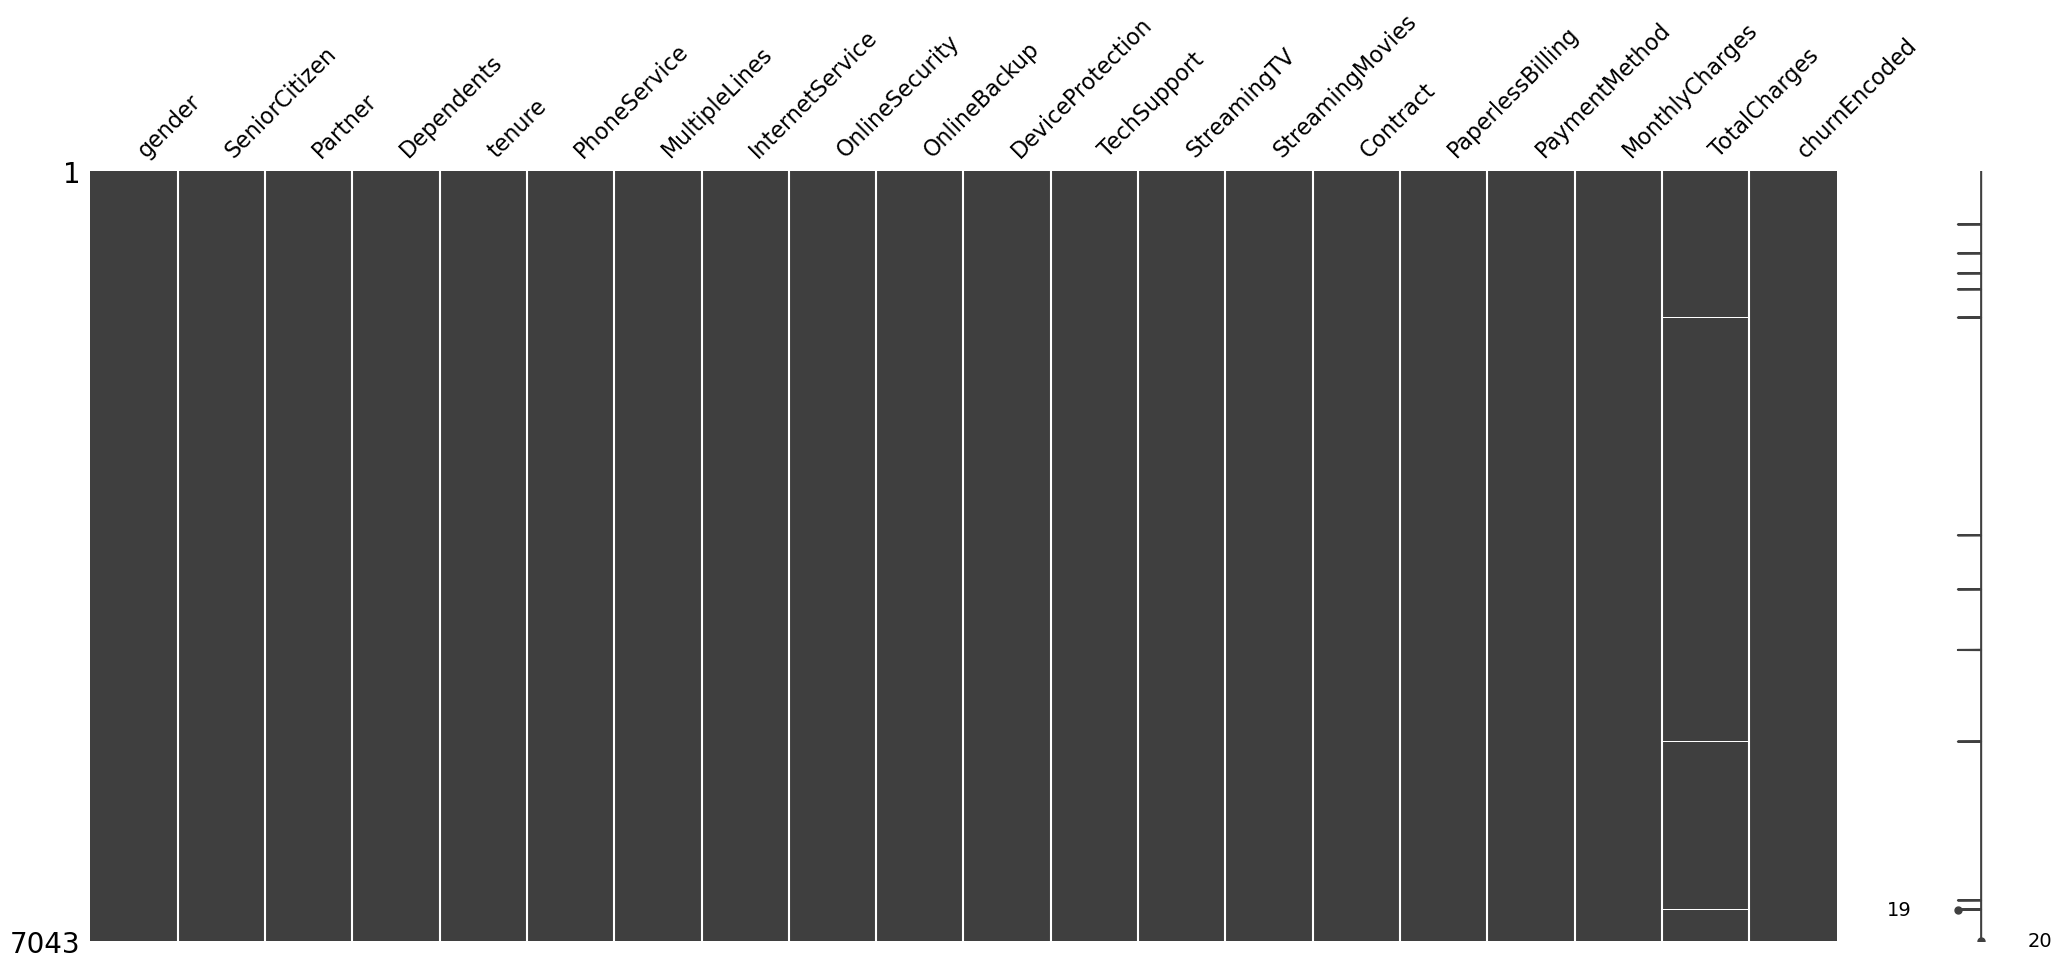

In [18]:
# Analizamos los valores nulos de TotalCharges
msno.matrix(df_client)

*3. La variable TotalCharges debemos inputar (eliminar o reemplazar por la media) los 11 registros ya que son pocos registros.*

### 2.1. Variables Cuantitativas

In [19]:
# Obtener las columnas numericas.
numeric_attributes = ['churnEncoded', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [20]:
# Asignar a df_numeric_attributes las columnas numéricas.
df_numeric_attributes = df_client[numeric_attributes]

In [21]:
# Cambiamos el background de los gráficos.
plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth": 0.5, "grid.alpha": 0.5})

churnEncoded
0    0.73463
1    0.26537
Name: proportion, dtype: float64

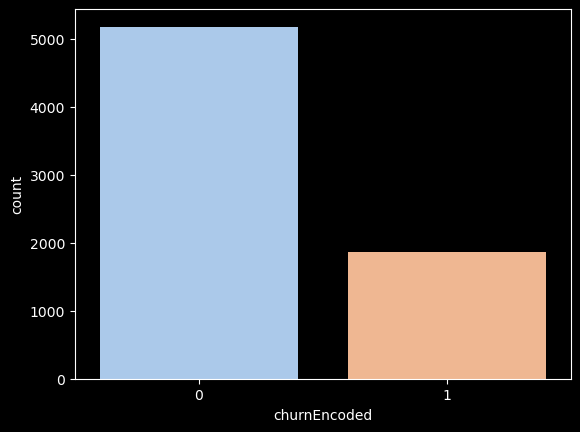

In [22]:
# Realizar la distribución de la variable Target.
sns.countplot(data= df_numeric_attributes, x= 'churnEncoded', palette= 'pastel')
df_client['churnEncoded'].value_counts(1).sort_index()

*4. El 74% de los clientes no han abandonado mientras que 26% de los clientes si lo hicieron.*

In [23]:
# Calcular más primera medidas estadísticas.
df_numeric_attributes.describe()

,churnEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.265370,0.162147,32.371149,64.761692,2283.300441
std,0.441561,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,9.000000,35.500000,401.450000
50%,0.000000,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,0.000000,55.000000,89.850000,3794.737500
max,1.000000,1.000000,72.000000,118.750000,8684.800000


*5.*
* De la variable "SeniorCitizen" más del 75% de los clientes no son adultos mayores.
* De las variables "tenure" y "MonthlyCharges", el promedio es mayor que la desviación estandar por lo que no existe valores atípicos extremos.

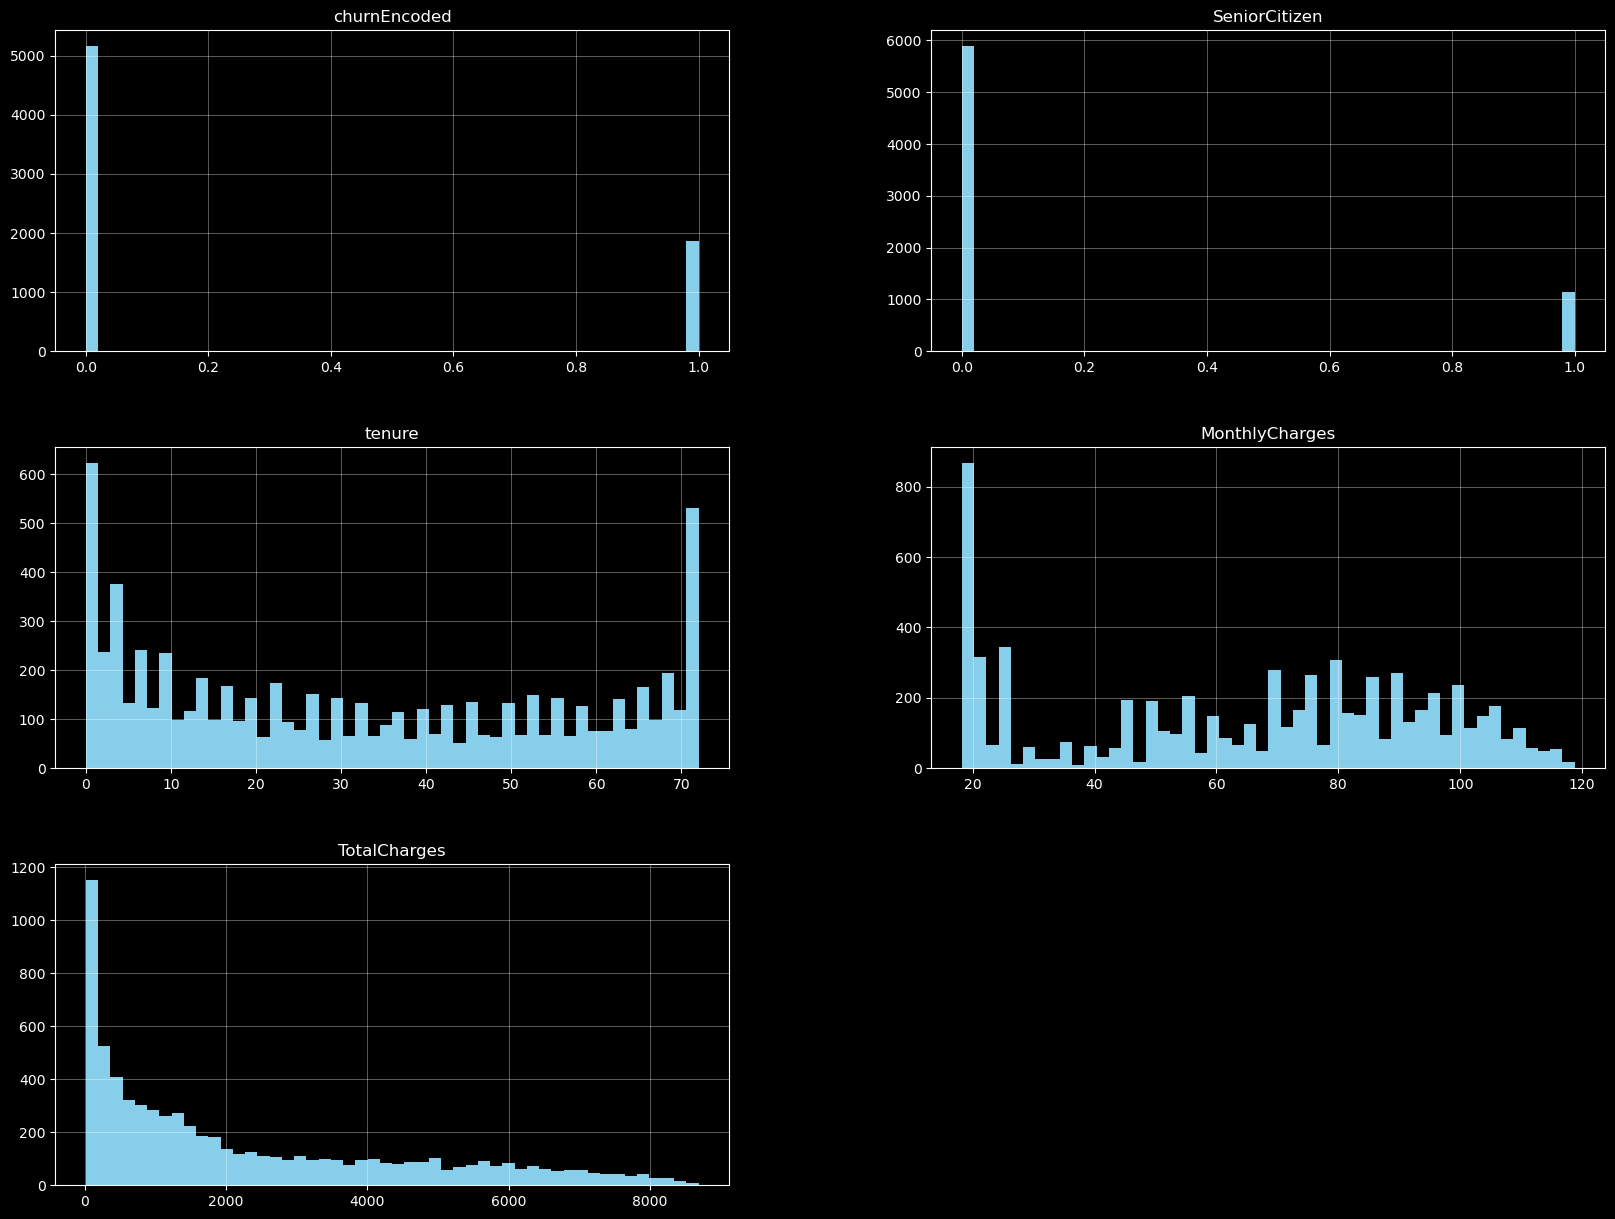

In [24]:
df_numeric_attributes[numeric_attributes].hist(bins= 50, figsize= (20, 15), color= 'skyblue')
plt.show()

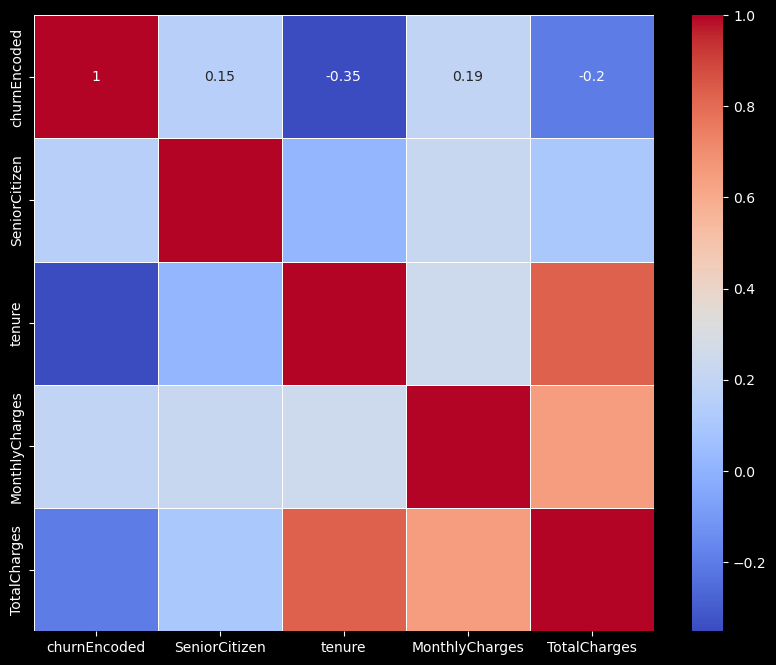

In [25]:
corr = df_numeric_attributes[numeric_attributes].corr()
plt.figure(figsize= (10, 8))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', linewidths= 0.5)
plt.show()

*6. Las variables numéricas que tienen más correlación con el target (abandono) son:*
- MonthyCharges (+).
- Tenure (-).

### 4.2. Variables Categóricas

In [26]:
df_categorical_attributes = df_client.select_dtypes(include= ['object'])

In [27]:
df_categorical_attributes.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

In [28]:
def categoricalFinding(colsNameCategoricas):    
    for colName in colsNameCategoricas:        
        display(df_client[[colName, 'churnEncoded']].groupby(colName).agg(['count', 'sum', 'mean']))

***Del total de clientes que fugaron representa un 26% del total de clientes***<br>
*7. Se afirma que tanto hombre como mujer fugaron en una misma proporción del 26%.*<br>
*8. Se afirma que el 32% de clientes que fugaron no tienen pareja.*<br>
*9. Se afirma que tanto clientes que tienen servicio telefónico o no fugaron en una misma proporción del 26%.*<br>
*10. Se afirma que el 28% de clientes que fugaron tienen multiplíneas y las demás categorías están cerca del 25%.*<br>
*11. Se afirma que el 41% de clientes que fugaron tienen fibra óptica, 18% tienen DSL.*<br>
*12. Se afirma que el 41% de clientes que fugaron no tienen seguridad en línea.*<br>
*13. Se afirma que el 39% de clientes que fugaron no tienen protección de dispositivo.*<br>
*14. Se afirma que el 41% de clientes que fugaron no tienen soporte técnico.*<br>
*15. Se afirma que el 33% de clientes que fugaron no tienen trasmisión por TV.*<br>
*16. Se afirma que el 33% de clientes que fugaron no tienen trasmisión por películas.*<br>
*17. Se afirma que el 42% de clientes que fugaron tienen un contrato mensual.*<br>
*18. Se afirma que el 45% de clientes que fugaron pagan por cheque electrónico y las demás categorías están cerca al 19%.*

In [29]:
categoricalFinding(df_categorical_attributes.columns)

churnEncoded               
              count  sum      mean
gender                            
Female         3488  939  0.269209
Male           3555  930  0.261603

churnEncoded                
               count   sum      mean
Partner                             
No              3641  1200  0.329580
Yes             3402   669  0.196649

churnEncoded                
                  count   sum      mean
Dependents                             
No                 4933  1543  0.312791
Yes                2110   326  0.154502

churnEncoded                
                    count   sum      mean
PhoneService                             
No                    682   170  0.249267
Yes                  6361  1699  0.267096

churnEncoded               
                        count  sum      mean
MultipleLines                               
No                       3390  849  0.250442
No phone service          682  170  0.249267
Yes                      2971  850  0.286099

churnEncoded                
                       count   sum      mean
InternetService                             
DSL                     2421   459  0.189591
Fiber optic             3096  1297  0.418928
No                      1526   113  0.074050

churnEncoded                
                           count   sum      mean
OnlineSecurity                                  
No                          3498  1461  0.417667
No internet service         1526   113  0.074050
Yes                         2019   295  0.146112

churnEncoded                
                           count   sum      mean
OnlineBackup                                    
No                          3088  1233  0.399288
No internet service         1526   113  0.074050
Yes                         2429   523  0.215315

churnEncoded                
                           count   sum      mean
DeviceProtection                                
No                          3095  1211  0.391276
No internet service         1526   113  0.074050
Yes                         2422   545  0.225021

churnEncoded                
                           count   sum      mean
TechSupport                                     
No                          3473  1446  0.416355
No internet service         1526   113  0.074050
Yes                         2044   310  0.151663

churnEncoded               
                           count  sum      mean
StreamingTV                                    
No                          2810  942  0.335231
No internet service         1526  113  0.074050
Yes                         2707  814  0.300702

churnEncoded               
                           count  sum      mean
StreamingMovies                                
No                          2785  938  0.336804
No internet service         1526  113  0.074050
Yes                         2732  818  0.299414

churnEncoded                
                      count   sum      mean
Contract                                   
Month-to-month         3875  1655  0.427097
One year               1473   166  0.112695
Two year               1695    48  0.028319

churnEncoded                
                        count   sum      mean
PaperlessBilling                             
No                       2872   469  0.163301
Yes                      4171  1400  0.335651

churnEncoded                
                                 count   sum      mean
PaymentMethod                                         
Bank transfer (automatic)         1544   258  0.167098
Credit card (automatic)           1522   232  0.152431
Electronic check                  2365  1071  0.452854
Mailed check                      1612   308  0.191067

## 5. Tratamiento de Datos

### 5.1. Eliminar Columnas que no Aportan Información Relevante

In [30]:
df_client.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churnEncoded'],
      dtype='object')

In [31]:
df_categorical_attributes.drop(columns= ['OnlineBackup', 'PaperlessBilling', 'Dependents'], axis= 1, inplace= True)

### 5.2. Imputar los Valores Mulos

In [32]:
df_numeric_attributes['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [33]:
# Reemplazar por la media porque son solo 11 registros que tienen nulos.
df_numeric_attributes.loc[:, 'TotalCharges'] = df_numeric_attributes['TotalCharges'].fillna(2283)

### 5.3. Convertir Variables Categóricas a Numéricas

In [34]:
df_categorical_attributes = df_categorical_attributes[df_categorical_attributes.columns]

In [35]:
df_categorical_attributes = pd.get_dummies(data= df_categorical_attributes, columns= ['gender', 'Partner', 'PhoneService'], drop_first= True, dtype= 'int64')

In [36]:
map_contratos = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
df_categorical_attributes['contratEncoder'] = df_categorical_attributes['Contract'].map(map_contratos)
df_categorical_attributes = df_categorical_attributes.drop(columns= ['Contract'], axis= 1)

In [37]:
df_categorical_attributes = pd.get_dummies(data= df_categorical_attributes, columns= ['MultipleLines', 'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineSecurity', 'InternetService'], dtype= 'int64')

### 5.4. Escalar, Normalizar & Estandarizar las Variables tenure, MonthlyCharges y TotalCharges
La razón por lo que se realiza es para probar mayor cantidad de modelos para encontrar el mejor modelo.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [39]:
dict_data_procesada = {}

In [40]:
data_limpia = pd.concat([df_numeric_attributes, df_categorical_attributes], axis= 1)
dict_data_procesada['data_limpia'] = data_limpia

In [41]:
data_limpia_standard = data_limpia.copy()
escalada_standard = StandardScaler().fit_transform(df_numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']])
data_limpia_standard['MonthlyCharges'] = escalada_standard[:, 0]
data_limpia_standard['TotalCharges'] = escalada_standard[:, 1]
data_limpia_standard['tenure'] = escalada_standard[:, 2]
dict_data_procesada['data_escalada_standard'] = data_limpia_standard

In [42]:
data_limpia_minmax = data_limpia.copy()
escalada_minmax = MinMaxScaler().fit_transform(df_numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']])
data_limpia_minmax['MonthlyCharges'] = escalada_minmax[:, 0]
data_limpia_minmax['TotalCharges'] = escalada_minmax[:, 1]
data_limpia_minmax['tenure'] = escalada_minmax[:, 2]
dict_data_procesada['data_escalada_minmax'] = data_limpia_minmax

In [43]:

data_limpia_robust = data_limpia.copy()
escalada_robust = RobustScaler().fit_transform(df_numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']])
data_limpia_robust['MonthlyCharges'] = escalada_robust[:, 0]
data_limpia_robust['TotalCharges'] = escalada_robust[:, 1]
data_limpia_robust['tenure'] = escalada_robust[:, 2]
dict_data_procesada['data_escalada_robust'] = data_limpia_robust

In [44]:
data_limpia_normalizer = data_limpia.copy()
normalizer_vector = Normalizer().fit_transform(df_numeric_attributes[['MonthlyCharges', 'TotalCharges', 'tenure']].T).T
data_limpia_normalizer['MonthlyCharges'] = normalizer_vector[:, 0]
data_limpia_normalizer['TotalCharges'] = normalizer_vector[:, 1]
data_limpia_normalizer['tenure'] = normalizer_vector[:, 2]
dict_data_procesada['data_normalizer_vector'] = data_limpia_normalizer

In [45]:
for key in dict_data_procesada.keys():
    display(dict_data_procesada[key].head())

,churnEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,PhoneService_Yes,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,29.85,29.85,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,34,56.95,1889.50,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,2,53.85,108.15,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,45,42.30,1840.75,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,2,70.70,151.65,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churnEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,PhoneService_Yes,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,-1.277445,-1.160323,-0.994971,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.066327,-0.259629,-0.173875,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,-1.236724,-0.362660,-0.960399,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.514251,-0.746535,-0.195400,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,-1.236724,0.197365,-0.941193,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churnEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,PhoneService_Yes,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0.013889,0.115423,0.001275,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.472222,0.385075,0.215867,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,0.027778,0.354229,0.010310,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.625000,0.239303,0.210241,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,0.027778,0.521891,0.015330,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churnEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,PhoneService_Yes,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,-0.608696,-0.745170,-0.405008,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.108696,-0.246550,0.144473,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,-0.586957,-0.303588,-0.381873,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.347826,-0.516099,0.130068,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,-0.586957,0.006440,-0.369019,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


,churnEncoded,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,PhoneService_Yes,contratEncoder,MultipleLines_No,...,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0.000293,0.004981,0.000111,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
5575-GNVDE,0,0,0.009971,0.009503,0.007001,1,0,1,2,1,...,0,0,0,1,0,0,1,1,0,0
3668-QPYBK,1,0,0.000587,0.008986,0.000401,1,0,1,1,1,...,0,1,0,0,0,0,1,1,0,0
7795-CFOCW,0,0,0.013197,0.007058,0.006820,1,0,0,2,0,...,1,0,0,1,0,0,1,1,0,0
9237-HQITU,1,0,0.000587,0.011797,0.000562,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0


## 6. Selección de Datos

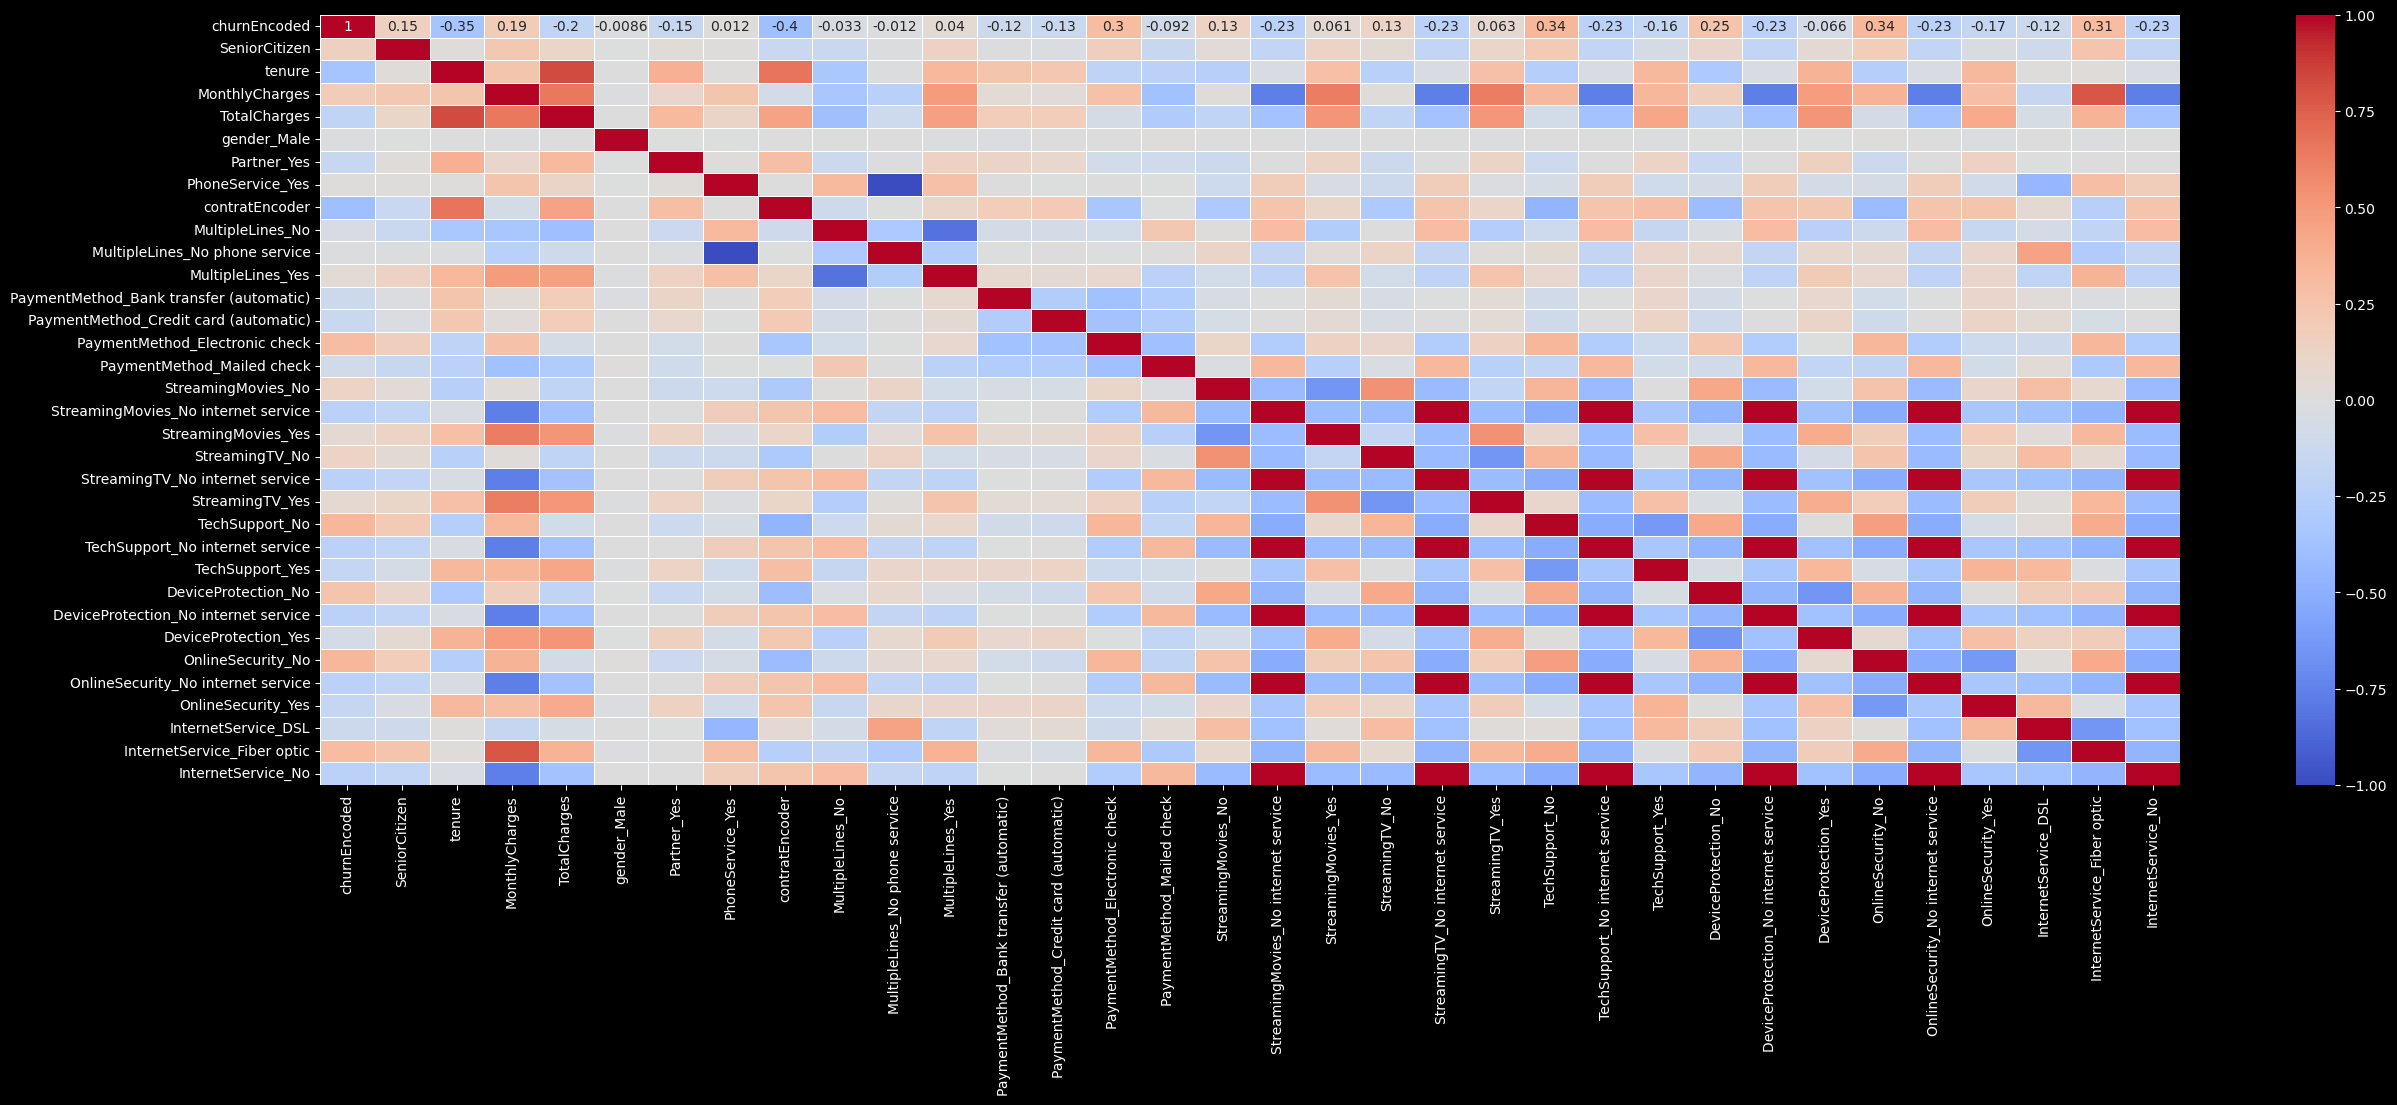

In [46]:
corr = dict_data_procesada['data_limpia'].corr()
plt.figure(figsize= (30, 10))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', linewidths= 0.5)
plt.show()

In [47]:
from sklearn.feature_selection import SelectKBest

X = dict_data_procesada['data_escalada_minmax'].drop(columns= ['churnEncoded'], axis= 1)
y = dict_data_procesada['data_escalada_minmax']['churnEncoded']

transformer = SelectKBest(k= 16)
X_new = transformer.fit_transform(X, y)

seleccionadas = transformer.get_support(indices= True)
print(X.columns[seleccionadas])

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'contratEncoder',
       'PaymentMethod_Electronic check', 'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')


In [48]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = {}, {}, {}, {}

for key in dict_data_procesada.keys():
    X = dict_data_procesada[key][['tenure', 'MonthlyCharges', 'TotalCharges', 'contratEncoder',
       'PaymentMethod_Electronic check', 'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_Fiber optic', 'InternetService_No']]
    y = dict_data_procesada[key]['churnEncoded']

    X_train[key], X_test[key], y_train[key], y_test[key] = model_selection.train_test_split(X, y, train_size= 0.75, test_size= 0.25, random_state= 42)    

## 7. Balanceo de Datos: Oversampling y Undersampling

In [49]:
# Definir los datos de entrenamientos en un dataframe.
df_train = {}

for key in X_train.keys():
    df_train[key] = pd.concat([X_train[key], y_train[key]], axis= 1)

In [50]:
# Dividimos las clases para el entreamiento.
count_class_0, count_class_1 = {}, {}
df_class_0, df_class_1 = {}, {}

for key in df_train.keys():
    count_class_0[key], count_class_1[key] = df_train[key]['churnEncoded'].value_counts()
    df_class_0[key] = df_train[key][df_train[key]['churnEncoded'] == 0]
    df_class_1[key] = df_train[key][df_train[key]['churnEncoded'] == 1]

In [51]:
for key in df_class_0.keys():
    print(f'{count_class_0[key]}, {len(df_class_0[key])}, {count_class_1[key]}, {len(df_class_1[key])}')

3892, 3892, 1390, 1390
3892, 3892, 1390, 1390
3892, 3892, 1390, 1390
3892, 3892, 1390, 1390
3892, 3892, 1390, 1390


### 7.1. Undersampling

In [52]:
df_class_0['data_limpia'].sample(3)

,tenure,MonthlyCharges,TotalCharges,contratEncoder,PaymentMethod_Electronic check,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No,TechSupport_No internet service,DeviceProtection_No,DeviceProtection_No internet service,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_Fiber optic,InternetService_No,churnEncoded
customerID,,,,,,,,,,,,,,,,,
1685-BQULA,40,93.40,3756.40,1,0,0,0,1,0,0,0,1,0,0,1,0,0
4000-VGMQP,38,78.95,2862.55,2,0,0,0,1,0,0,0,1,0,0,0,0,0
0716-BQNDX,57,93.75,5625.55,3,1,0,0,0,0,1,0,0,0,1,1,0,0


Estrategia de muestra under-sampling data_limpia
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Estrategia de muestra under-sampling data_escalada_standard
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Estrategia de muestra under-sampling data_escalada_minmax
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Estrategia de muestra under-sampling data_escalada_robust
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Estrategia de muestra under-sampling data_normalizer_vector
churnEncoded
0    1390
1    1390
Name: count, dtype: int64


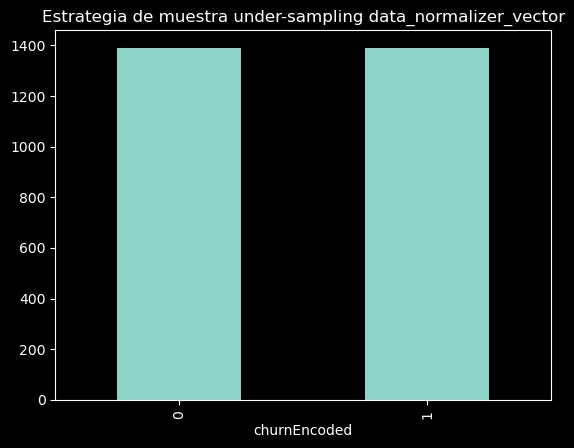

In [53]:
df_class_0_under = {}
df_train_under = {}

for key in df_class_0.keys():
    # Estrategia de undersampling para balancear la cantidad de 0 a la cantidad 1.
    df_class_0_under[key] = df_class_0[key].sample(count_class_1[key], random_state= 42)
    df_train_under[key] = pd.concat([df_class_0_under[key], df_class_1[key]], axis= 0)
    
    print(f'Estrategia de muestra under-sampling {key}')
    print(df_train_under[key]['churnEncoded'].value_counts())
    df_train_under[key]['churnEncoded'].value_counts().plot(kind= 'bar', title= f'Estrategia de muestra under-sampling {key}')

### 7.2. Oversampling

In [54]:
aux = df_class_1['data_limpia'].head(2)
aux.sample(3, replace= True)

,tenure,MonthlyCharges,TotalCharges,contratEncoder,PaymentMethod_Electronic check,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No,TechSupport_No internet service,DeviceProtection_No,DeviceProtection_No internet service,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,InternetService_Fiber optic,InternetService_No,churnEncoded
customerID,,,,,,,,,,,,,,,,,
2276-YDAVZ,3,75.1,270.7,1,0,0,0,1,0,1,0,1,0,0,1,0,1
2276-YDAVZ,3,75.1,270.7,1,0,0,0,1,0,1,0,1,0,0,1,0,1
2276-YDAVZ,3,75.1,270.7,1,0,0,0,1,0,1,0,1,0,0,1,0,1


Estrategia de muestra over-sampling data_limpia
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Estrategia de muestra over-sampling data_escalada_standard
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Estrategia de muestra over-sampling data_escalada_minmax
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Estrategia de muestra over-sampling data_escalada_robust
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Estrategia de muestra over-sampling data_normalizer_vector
churnEncoded
0    3892
1    3892
Name: count, dtype: int64


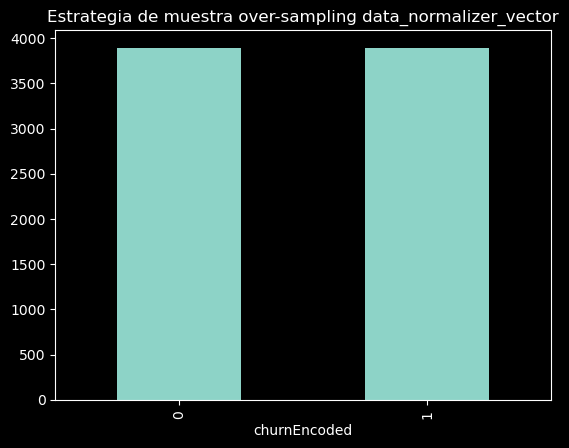

In [55]:
df_class_1_over = {}
df_train_over = {}

for key in df_class_1.keys():
    # Estrategia de oversampling para balancear la cantidad de 1 a la cantidad 0.
    df_class_1_over[key] = df_class_1[key].sample(count_class_0[key], replace= True, random_state= 42)
    df_train_over[key] = pd.concat([df_class_0[key], df_class_1_over[key]], axis= 0)
    
    print(f'Estrategia de muestra over-sampling {key}')
    print(df_train_over[key]['churnEncoded'].value_counts())
    df_train_over[key]['churnEncoded'].value_counts().plot(kind= 'bar', title= f'Estrategia de muestra over-sampling {key}')

In [56]:
for key in df_train.keys():
    print(f'Balanceo de clases en el dataset {key}')
    print(df_train[key]['churnEncoded'].value_counts())

Balanceo de clases en el dataset data_limpia
churnEncoded
0    3892
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_standard
churnEncoded
0    3892
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_minmax
churnEncoded
0    3892
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_robust
churnEncoded
0    3892
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_normalizer_vector
churnEncoded
0    3892
1    1390
Name: count, dtype: int64


In [57]:
for key in df_train_under.keys():
    print(f'Balanceo de clases en el dataset {key}')
    print(df_train_under[key]['churnEncoded'].value_counts())

Balanceo de clases en el dataset data_limpia
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_standard
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_minmax
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_robust
churnEncoded
0    1390
1    1390
Name: count, dtype: int64
Balanceo de clases en el dataset data_normalizer_vector
churnEncoded
0    1390
1    1390
Name: count, dtype: int64


In [58]:
for key in df_train_over.keys():
    print(f'Balanceo de clases en el dataset {key}')
    print(df_train_over[key]['churnEncoded'].value_counts())

Balanceo de clases en el dataset data_limpia
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_standard
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_minmax
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Balanceo de clases en el dataset data_escalada_robust
churnEncoded
0    3892
1    3892
Name: count, dtype: int64
Balanceo de clases en el dataset data_normalizer_vector
churnEncoded
0    3892
1    3892
Name: count, dtype: int64


### 7.3. Evaluación de Resultados de las Estrategias de Muestreo.

#### 7.3.1. Data sin Oversampling y Undersampling

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

y_pred = {}

for key in df_train.keys():
    # Declarar el modelo.
    model = DecisionTreeClassifier()
    # Entrenar el modelo.
    model.fit(X_train[key], y_train[key])
    # Generar la predicción.
    y_pred[key] = model.predict(X_test[key])

    accuracy = accuracy_score(y_test[key], y_pred[key])
    print(f'Accuary DATOS ORIGINALES - {key}: {accuracy * 100}')

    ll = log_loss(y_test[key], y_pred[key])
    print(f'Log Loss: {ll}')

    print(f'Métricas de la matriz de confusión DATOS ORIGINALES - {key}:\n {classification_report(y_test[key], y_pred[key])}')
    

Accuary DATOS ORIGINALES - data_limpia: 74.0488358886996
Log Loss: 9.353747642718082
Métricas de la matriz de confusión DATOS ORIGINALES - data_limpia:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1282
           1       0.52      0.50      0.51       479

    accuracy                           0.74      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.74      0.74      0.74      1761

Accuary DATOS ORIGINALES - data_escalada_standard: 74.0488358886996
Log Loss: 9.353747642718078
Métricas de la matriz de confusión DATOS ORIGINALES - data_escalada_standard:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1282
           1       0.52      0.50      0.51       479

    accuracy                           0.74      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.74      0.74      0.74      1761

Accuary DATOS ORIG

#### 7.3.2. Undersampling

In [60]:
df_train_under['data_limpia'].columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'contratEncoder',
       'PaymentMethod_Electronic check', 'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_Fiber optic', 'InternetService_No', 'churnEncoded'],
      dtype='object')

In [61]:
model = DecisionTreeClassifier()
X_train_u, y_train_u = {}, {}
y_pred = {}

for key in df_train_under.keys():
    X_train_u[key] = df_train_under[key][['tenure', 'MonthlyCharges', 'TotalCharges', 'contratEncoder',
       'PaymentMethod_Electronic check', 'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_Fiber optic', 'InternetService_No']]
    y_train_u[key] = df_train_under[key]['churnEncoded']
    
    # Entrenar el modelo.
    model.fit(X_train_u[key], y_train_u[key])
    
    # Generar la predicción.
    y_pred[key] = model.predict(X_test[key])

    accuracy = accuracy_score(y_test[key], y_pred[key])
    print(f'Accuary DATOS UNDER-SAMPLING - {key}: {accuracy * 100}')

    ll = log_loss(y_test[key], y_pred[key])
    print(f'Log Loss: {ll}')

    print(f'Métricas de la matriz de confusión DATOS UNDER-SAMPLING - {key}:\n {classification_report(y_test[key], y_pred[key])}')  

Accuary DATOS UNDER-SAMPLING - data_limpia: 68.76774559909143
Log Loss: 11.257245521870773
Métricas de la matriz de confusión DATOS UNDER-SAMPLING - data_limpia:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76      1282
           1       0.45      0.68      0.54       479

    accuracy                           0.69      1761
   macro avg       0.65      0.69      0.65      1761
weighted avg       0.74      0.69      0.70      1761

Accuary DATOS UNDER-SAMPLING - data_escalada_standard: 69.6763202725724
Log Loss: 10.929762015779987
Métricas de la matriz de confusión DATOS UNDER-SAMPLING - data_escalada_standard:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77      1282
           1       0.46      0.70      0.56       479

    accuracy                           0.70      1761
   macro avg       0.66      0.70      0.66      1761
weighted avg       0.75      0.70      0.71      1761


#### 5.3.3. Oversampling

In [62]:
model = DecisionTreeClassifier()
X_train_o, y_train_o = {}, {}
y_pred = {}

for key in df_train_under.keys():
    X_train_o[key] = df_train_over[key][['tenure', 'MonthlyCharges', 'TotalCharges', 'contratEncoder',
       'PaymentMethod_Electronic check', 'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No',
       'TechSupport_No internet service', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_Fiber optic', 'InternetService_No']]
    y_train_o[key] = df_train_over[key]['churnEncoded']
    
    # Entrenar el modelo.
    model.fit(X_train_o[key], y_train_o[key])
    
    # Generar la predicción.
    y_pred[key] = model.predict(X_test[key])

    accuracy = accuracy_score(y_test[key], y_pred[key])
    print(f'Accuary DATOS UNDER-SAMPLING - {key}: {accuracy * 100}')

    ll = log_loss(y_test[key], y_pred[key])
    print(f'Log Loss: {ll}')

    print(f'Métricas de la matriz de confusión DATOS UNDER-SAMPLING - {key}:\n {classification_report(y_test[key], y_pred[key])}')  

Accuary DATOS UNDER-SAMPLING - data_limpia: 72.96990346394094
Log Loss: 9.742634306200888
Métricas de la matriz de confusión DATOS UNDER-SAMPLING - data_limpia:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1282
           1       0.50      0.45      0.48       479

    accuracy                           0.73      1761
   macro avg       0.65      0.64      0.65      1761
weighted avg       0.72      0.73      0.72      1761

Accuary DATOS UNDER-SAMPLING - data_escalada_standard: 73.08347529812606
Log Loss: 9.701698867939541
Métricas de la matriz de confusión DATOS UNDER-SAMPLING - data_escalada_standard:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1282
           1       0.51      0.45      0.47       479

    accuracy                           0.73      1761
   macro avg       0.65      0.64      0.65      1761
weighted avg       0.72      0.73      0.73      1761



## 8. Modelado

### 8.1. Modelo con Datos Limpios

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [64]:

modelo_1 = xgb.XGBClassifier()
modelo_2 = xgb.XGBClassifier(max_depth= 8, n_estimators= 40, learning_rate= 0.1, subsample= 0.5)
modelo_3 = RandomForestClassifier()
modelo_4 = RandomForestClassifier(n_estimators= 40, max_depth= 8, random_state= 42)
modelo_5 = SVC()
modelo_6 = SVC(kernel= 'linear', C= 0.025, random_state= 42)
modelo_7 = DecisionTreeClassifier()
modelo_8 = DecisionTreeClassifier(max_depth= 8, random_state= 42)
modelo_9 =  LogisticRegression()
modelo_10 = LogisticRegression(random_state= 42, max_iter= 1000)

In [65]:
modelo_1.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
modelo_2.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
modelo_3.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

RandomForestClassifier()

In [68]:
modelo_4.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42)

In [69]:
modelo_5.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

SVC()

In [70]:
modelo_6.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

SVC(C=0.025, kernel='linear', random_state=42)

In [71]:
modelo_7.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

DecisionTreeClassifier()

In [72]:
modelo_8.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [73]:
modelo_9.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

LogisticRegression()

In [74]:
modelo_10.fit(X_train_u['data_limpia'], y_train_u['data_limpia'])

LogisticRegression(max_iter=1000, random_state=42)

In [75]:
pred1 = modelo_1.predict(X_test['data_limpia'])
pred2 = modelo_2.predict(X_test['data_limpia'])
pred3 = modelo_3.predict(X_test['data_limpia'])
pred4 = modelo_4.predict(X_test['data_limpia'])
pred5 = modelo_5.predict(X_test['data_limpia'])
pred6 = modelo_6.predict(X_test['data_limpia'])
pred7 = modelo_7.predict(X_test['data_limpia'])
pred8 = modelo_8.predict(X_test['data_limpia'])
pred9 = modelo_9.predict(X_test['data_limpia'])
pred10 = modelo_10.predict(X_test['data_limpia'])

In [76]:
print(classification_report(y_test['data_limpia'], pred1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.78      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [77]:
print(classification_report(y_test['data_limpia'], pred2))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1282
           1       0.53      0.80      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.77      1761



In [78]:
print(classification_report(y_test['data_limpia'], pred3))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1282
           1       0.52      0.76      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.76      1761



In [79]:
print(classification_report(y_test['data_limpia'], pred4))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.54      0.84      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761



In [80]:
print(classification_report(y_test['data_limpia'], pred5))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1282
           1       0.41      0.54      0.46       479

    accuracy                           0.66      1761
   macro avg       0.60      0.62      0.61      1761
weighted avg       0.70      0.66      0.67      1761



In [81]:
print(classification_report(y_test['data_limpia'], pred6))

              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1282
           1       0.51      0.84      0.63       479

    accuracy                           0.73      1761
   macro avg       0.71      0.77      0.71      1761
weighted avg       0.81      0.73      0.75      1761



In [82]:
print(classification_report(y_test['data_limpia'], pred7))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1282
           1       0.46      0.70      0.55       479

    accuracy                           0.69      1761
   macro avg       0.66      0.70      0.66      1761
weighted avg       0.75      0.69      0.71      1761



In [83]:
print(classification_report(y_test['data_limpia'], pred8))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1282
           1       0.52      0.76      0.61       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [84]:
print(classification_report(y_test['data_limpia'], pred9))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.53      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.76      1761



In [85]:
print(classification_report(y_test['data_limpia'], pred10))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.53      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.76      1761



### 8.2. Modelo con Data Escalada MinMax

In [86]:
modelo_1.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
modelo_2.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
modelo_3.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

RandomForestClassifier()

In [89]:
modelo_4.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42)

In [90]:
modelo_5.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

SVC()

In [91]:
modelo_6.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

SVC(C=0.025, kernel='linear', random_state=42)

In [92]:
modelo_7.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

DecisionTreeClassifier()

In [93]:
modelo_8.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [94]:
modelo_9.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

LogisticRegression()

In [95]:
modelo_10.fit(X_train_u['data_escalada_minmax'], y_train_u['data_escalada_minmax'])

LogisticRegression(max_iter=1000, random_state=42)

In [96]:
pred1 = modelo_1.predict(X_test['data_escalada_minmax'])
pred2 = modelo_2.predict(X_test['data_escalada_minmax'])
pred3 = modelo_3.predict(X_test['data_escalada_minmax'])
pred4 = modelo_4.predict(X_test['data_escalada_minmax'])
pred5 = modelo_5.predict(X_test['data_escalada_minmax'])
pred6 = modelo_6.predict(X_test['data_escalada_minmax'])
pred7 = modelo_7.predict(X_test['data_escalada_minmax'])
pred8 = modelo_8.predict(X_test['data_escalada_minmax'])
pred9 = modelo_9.predict(X_test['data_escalada_minmax'])
pred10 = modelo_10.predict(X_test['data_escalada_minmax'])

In [97]:
print(classification_report(y_test['data_escalada_minmax'], pred1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.78      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [98]:
print(classification_report(y_test['data_escalada_minmax'], pred2))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1282
           1       0.53      0.80      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.77      1761



In [99]:
print(classification_report(y_test['data_escalada_minmax'], pred3))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1282
           1       0.52      0.77      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [100]:
print(classification_report(y_test['data_escalada_minmax'], pred4))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.53      0.84      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761



In [101]:
print(classification_report(y_test['data_escalada_minmax'], pred5))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1282
           1       0.51      0.80      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761



In [102]:
print(classification_report(y_test['data_escalada_minmax'], pred6))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1282
           1       0.49      0.85      0.62       479

    accuracy                           0.72      1761
   macro avg       0.71      0.76      0.70      1761
weighted avg       0.81      0.72      0.73      1761



In [103]:
print(classification_report(y_test['data_escalada_minmax'], pred7))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1282
           1       0.45      0.68      0.54       479

    accuracy                           0.69      1761
   macro avg       0.65      0.68      0.65      1761
weighted avg       0.74      0.69      0.70      1761



In [104]:
print(classification_report(y_test['data_escalada_minmax'], pred8))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1282
           1       0.52      0.76      0.61       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [105]:
print(classification_report(y_test['data_escalada_minmax'], pred9))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.52      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



In [106]:
print(classification_report(y_test['data_escalada_minmax'], pred10))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.52      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



### 8.3. Modelo con Data Escalada Robust

In [107]:
modelo_1.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
modelo_2.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
modelo_3.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

RandomForestClassifier()

In [110]:
modelo_4.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42)

In [111]:
modelo_5.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

SVC()

In [112]:
modelo_6.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

SVC(C=0.025, kernel='linear', random_state=42)

In [113]:
modelo_7.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

DecisionTreeClassifier()

In [114]:
modelo_8.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [115]:
modelo_9.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

LogisticRegression()

In [116]:
modelo_10.fit(X_train_u['data_escalada_robust'], y_train_u['data_escalada_robust'])

LogisticRegression(max_iter=1000, random_state=42)

In [117]:
pred1 = modelo_1.predict(X_test['data_escalada_robust'])
pred2 = modelo_2.predict(X_test['data_escalada_robust'])
pred3 = modelo_3.predict(X_test['data_escalada_robust'])
pred4 = modelo_4.predict(X_test['data_escalada_robust'])
pred5 = modelo_5.predict(X_test['data_escalada_robust'])
pred6 = modelo_6.predict(X_test['data_escalada_robust'])
pred7 = modelo_7.predict(X_test['data_escalada_robust'])
pred8 = modelo_8.predict(X_test['data_escalada_robust'])
pred9 = modelo_9.predict(X_test['data_escalada_robust'])
pred10 = modelo_10.predict(X_test['data_escalada_robust'])

In [118]:
print(classification_report(y_test['data_escalada_robust'], pred1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.78      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [119]:
print(classification_report(y_test['data_escalada_minmax'], pred2))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1282
           1       0.53      0.80      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.77      1761



In [120]:
print(classification_report(y_test['data_escalada_minmax'], pred3))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1282
           1       0.53      0.78      0.63       479

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



In [121]:
print(classification_report(y_test['data_escalada_minmax'], pred4))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.54      0.84      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761



In [122]:
print(classification_report(y_test['data_escalada_minmax'], pred5))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.52      0.79      0.63       479

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761



In [123]:
print(classification_report(y_test['data_escalada_minmax'], pred6))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1282
           1       0.50      0.85      0.62       479

    accuracy                           0.72      1761
   macro avg       0.71      0.76      0.70      1761
weighted avg       0.81      0.72      0.74      1761



In [124]:
print(classification_report(y_test['data_escalada_minmax'], pred7))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1282
           1       0.46      0.70      0.56       479

    accuracy                           0.69      1761
   macro avg       0.66      0.70      0.66      1761
weighted avg       0.75      0.69      0.71      1761



In [125]:
print(classification_report(y_test['data_escalada_minmax'], pred8))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1282
           1       0.52      0.76      0.61       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [126]:
print(classification_report(y_test['data_escalada_minmax'], pred9))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1282
           1       0.52      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



In [127]:
print(classification_report(y_test['data_escalada_minmax'], pred10))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1282
           1       0.52      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



### 8.4. Modelo con Data Escalada Standard

In [128]:
modelo_1.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
modelo_2.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [130]:
modelo_3.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

RandomForestClassifier()

In [131]:
modelo_4.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42)

In [132]:
modelo_5.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

SVC()

In [133]:
modelo_6.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

SVC(C=0.025, kernel='linear', random_state=42)

In [134]:
modelo_7.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

DecisionTreeClassifier()

In [135]:
modelo_8.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [136]:
modelo_9.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

LogisticRegression()

In [137]:
modelo_10.fit(X_train_u['data_escalada_standard'], y_train_u['data_escalada_standard'])

LogisticRegression(max_iter=1000, random_state=42)

In [138]:
pred1 = modelo_1.predict(X_test['data_escalada_standard'])
pred2 = modelo_2.predict(X_test['data_escalada_standard'])
pred3 = modelo_3.predict(X_test['data_escalada_standard'])
pred4 = modelo_4.predict(X_test['data_escalada_standard'])
pred5 = modelo_5.predict(X_test['data_escalada_standard'])
pred6 = modelo_6.predict(X_test['data_escalada_standard'])
pred7 = modelo_7.predict(X_test['data_escalada_standard'])
pred8 = modelo_8.predict(X_test['data_escalada_standard'])
pred9 = modelo_9.predict(X_test['data_escalada_standard'])
pred10 = modelo_10.predict(X_test['data_escalada_standard'])

In [139]:
print(classification_report(y_test['data_escalada_standard'], pred1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.78      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [140]:
print(classification_report(y_test['data_escalada_standard'], pred2))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1282
           1       0.53      0.80      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.77      1761



In [141]:
print(classification_report(y_test['data_escalada_standard'], pred3))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1282
           1       0.52      0.77      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.76      1761



In [142]:
print(classification_report(y_test['data_escalada_standard'], pred4))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.54      0.84      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761



In [143]:
print(classification_report(y_test['data_escalada_standard'], pred5))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1282
           1       0.53      0.79      0.63       479

    accuracy                           0.75      1761
   macro avg       0.72      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



In [144]:
print(classification_report(y_test['data_escalada_standard'], pred6))

              precision    recall  f1-score   support

           0       0.92      0.68      0.79      1282
           1       0.50      0.85      0.63       479

    accuracy                           0.73      1761
   macro avg       0.71      0.77      0.71      1761
weighted avg       0.81      0.73      0.74      1761



In [145]:
print(classification_report(y_test['data_escalada_standard'], pred7))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76      1282
           1       0.45      0.70      0.55       479

    accuracy                           0.69      1761
   macro avg       0.66      0.69      0.66      1761
weighted avg       0.75      0.69      0.71      1761



In [146]:
print(classification_report(y_test['data_escalada_standard'], pred8))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1282
           1       0.52      0.76      0.62       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [147]:
print(classification_report(y_test['data_escalada_standard'], pred9))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.52      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



In [148]:
print(classification_report(y_test['data_escalada_standard'], pred10))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1282
           1       0.52      0.82      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



### 8.5. Modelado con Data Normalizer Vector

In [149]:
modelo_1.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [150]:
modelo_2.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
modelo_3.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

RandomForestClassifier()

In [152]:
modelo_4.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42)

In [153]:
modelo_5.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

SVC()

In [154]:
modelo_6.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

SVC(C=0.025, kernel='linear', random_state=42)

In [155]:
modelo_7.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

DecisionTreeClassifier()

In [156]:
modelo_8.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [157]:
modelo_9.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

LogisticRegression()

In [158]:
modelo_10.fit(X_train_u['data_normalizer_vector'], y_train_u['data_normalizer_vector'])

LogisticRegression(max_iter=1000, random_state=42)

In [159]:
pred1 = modelo_1.predict(X_test['data_normalizer_vector'])
pred2 = modelo_2.predict(X_test['data_normalizer_vector'])
pred3 = modelo_3.predict(X_test['data_normalizer_vector'])
pred4 = modelo_4.predict(X_test['data_normalizer_vector'])
pred5 = modelo_5.predict(X_test['data_normalizer_vector'])
pred6 = modelo_6.predict(X_test['data_normalizer_vector'])
pred7 = modelo_7.predict(X_test['data_normalizer_vector'])
pred8 = modelo_8.predict(X_test['data_normalizer_vector'])
pred9 = modelo_9.predict(X_test['data_normalizer_vector'])
pred10 = modelo_10.predict(X_test['data_normalizer_vector'])

In [160]:
print(classification_report(y_test['data_normalizer_vector'], pred1))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1282
           1       0.51      0.78      0.62       479

    accuracy                           0.74      1761
   macro avg       0.71      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [161]:
print(classification_report(y_test['data_normalizer_vector'], pred2))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1282
           1       0.53      0.80      0.64       479

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.73      1761
weighted avg       0.81      0.75      0.77      1761



In [162]:
print(classification_report(y_test['data_normalizer_vector'], pred3))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1282
           1       0.53      0.78      0.63       479

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.72      1761
weighted avg       0.80      0.75      0.76      1761



In [163]:
print(classification_report(y_test['data_normalizer_vector'], pred4))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1282
           1       0.53      0.84      0.65       479

    accuracy                           0.76      1761
   macro avg       0.73      0.78      0.73      1761
weighted avg       0.82      0.76      0.77      1761



In [164]:
print(classification_report(y_test['data_normalizer_vector'], pred5))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1282
           1       0.50      0.80      0.62       479

    accuracy                           0.73      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.80      0.73      0.75      1761



In [165]:
print(classification_report(y_test['data_normalizer_vector'], pred6))

              precision    recall  f1-score   support

           0       0.92      0.65      0.77      1282
           1       0.48      0.85      0.61       479

    accuracy                           0.71      1761
   macro avg       0.70      0.75      0.69      1761
weighted avg       0.80      0.71      0.72      1761



In [166]:
print(classification_report(y_test['data_normalizer_vector'], pred7))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75      1282
           1       0.44      0.68      0.54       479

    accuracy                           0.68      1761
   macro avg       0.65      0.68      0.64      1761
weighted avg       0.74      0.68      0.69      1761



In [167]:
print(classification_report(y_test['data_normalizer_vector'], pred8))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1282
           1       0.52      0.76      0.61       479

    accuracy                           0.74      1761
   macro avg       0.70      0.75      0.71      1761
weighted avg       0.79      0.74      0.75      1761



In [168]:
print(classification_report(y_test['data_normalizer_vector'], pred9))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1282
           1       0.51      0.81      0.63       479

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761



In [169]:
print(classification_report(y_test['data_normalizer_vector'], pred10))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1282
           1       0.51      0.81      0.63       479

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.80      0.74      0.75      1761



## 9. Conclusión


Se han evaluado 50 modelos con el objetivo de identificar el más eficaz en el ámbito del aprendizaje automático para predecir la fuga de clientes en una empresa de telecomunicaciones. Este proyecto tiene como finalidad detectar a los clientes potenciales que podrían abandonar la empresa, permitiendo así el diseño de programas específicos para retenerlos y fortalecer su vínculo con la compañía.

*Martin Abel Reyes Rojas.*
